<a href="https://colab.research.google.com/github/VAIBHAV0526/ML_PROJECT_MONUMENTS_DETECTION_/blob/main/eml_experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPERIMENT 3 ELECTROMAGNETIC THEORY 

In [1]:
#LETS LOOK AT THE THEORY PART WE DIVE IN THE ACTUAL PROGRAMME

Relative permittivity (dielectric constant) εr of liquid water is in general is a complex quantity
and is a strong function of frequency and temperature. It has been studied extensively in the literature
[3][4] and is usually computed by double Debye formulation [5]

#εr = (ε0 − ε1) / [1 + (f/fp)] + (ε1 − ε2) / [1 + j(f/fs)] + ε2


Real and imaginary parts of complex permittivity of above equation are:
Real part is given by
εr
׳
(f) = ( ε0 − ε1)/[ 1 + (f/fp)
2
] + ( ε1 − ε2)/[ 1 + (f/fs)
2
] + ε2 (2.16)

Imaginary part is given by



 (er״)f) = ( ε0 − ε1)(f/fp)/[ 1 + (f/fp)^2] + ( ε1 − ε2)(f/fs) /[1 + (f/fs)^2]




Three permittivity constants [1],
ε0 = ε0(T) = 77.66 + 103.3(θ − 1)
ε1 = 5.48 and ε2 = 3.51 (2.18)
In addition to principal and secondary relaxation frequencies,
fp(T) = 20.09 − 142.4(θ − 1) + 294(θ − 1)

2 GHz (2.19)

and
fs
(T) = 590 − 1500(θ − 1) GHz (2.20)
The relative inverse temperature variable (θ) is given by,
θ = 300/[T + 273.15] (2.21)
Where T is the temperature in 0 ̊ C

In [2]:
# objective

In [3]:
#genrating the data for some case


#case 1
#real part for sevral frequncy
#Real part of Permittivity of water vs Frequency at several temperatures

 temp  points are. -5 
                      0 
                      5
                      10 temp in C
                fs (T) = 590 − 1500(θ − 1) GHz (2.20)
                εr = (ε0 − ε1) / [1 + (f/fp)] + (ε1 − ε2) / [1 + j(f/fs)] + ε2

                the realeation  that.we are going to use in 
                fp(T) = 20.09 − 142.4(θ − 1) + 294(θ − 1)^2 GHz

In [4]:
# at temp  realated function

def freqs(temp):
  return 590-1500*(temp-1)
def freqp(temp):
    return 20.09-(142.4*(temp-1))+(294*(temp-1)*(temp-1))
def Eo(temp):
  return 77.66+103.3*(temp-1)



In [5]:
#εr = (ε0 − ε1) / [1 + (f/fp)] + (ε1 − ε2) / [1 + j(f/fs)] + ε2
#er'=εr
E1=5.48
E2=3.51
def real_E(freq,temp):
    eo=Eo(temp)
    fs=freqs(temp)
    fp=freqp(temp)
    a1=eo-E1
    a2=E1-E2
    b1=freq/fp
    b2=freq/fs
    return a1/(1+b1*b1)+a2/(1+b2*b2)+E2
# realation
def imaginary(freq,temp):
    eo=Eo(temp)
    fs=freqs(temp)
    fp=freqp(temp)
    a1=eo-E1
    a2=E1-E2
    b1=freq/fp
    b2=freq/fs
    return a1*b1/(1+b1*b1)+a2*b2/(1+b2*b2);

    
     

   

In [6]:
temperture=[-5 ,0, 5,10]
data=[]
data2=[]
for freq in range(30,301):
    lis=[]
    lis2=[]
    for temp in temperture:
        t=300/(temp+275.15)
        lis.append(real_E(freq,t))
        lis2.append(imaginary(freq,t))
    data.append(lis)
    data2.append(lis2)
 



In [7]:
import numpy as np
import pandas as pd
df=pd.DataFrame(data,columns=['-5','0','5','10']) 
df2=pd.DataFrame(data,columns=['5','0','5','10'])





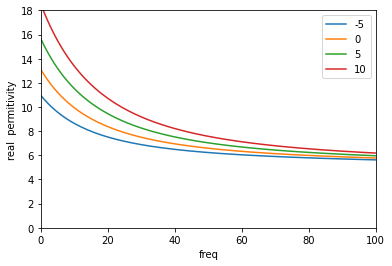

In [8]:
import matplotlib.pyplot as plt
df.plot()
plt.ylim(0, 18)
plt.xlim(0,100)
plt.xlabel("freq")
plt.ylabel("real"+ "  permitivity")
plt.show()



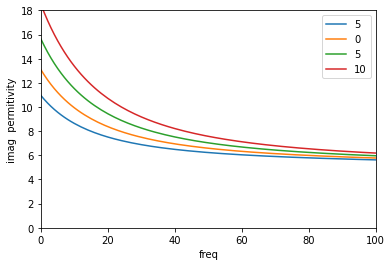

In [9]:
df2.plot()
plt.ylim(0, 18)
plt.xlim(0,100)
plt.xlabel("freq")
plt.ylabel("imag"+ "  permitivity")
plt.show()

In [11]:
# TEMP VS REAL AND imaginary PART

UsageError: Line magic function `%` not found.


In [12]:
frequency=[30,60,94,140,240,270]
data1=[]
data2=[]
for temp in range(-5,11):
    lis1=[]
    lis2=[]
    for freq in frequency:
         t=300/(temp+275.15)
         lis1.append(real_E(freq,t))
         lis2.append(imaginary(freq,t))
    data1.append(lis1)
    data2.append(lis2)



In [13]:
df3=pd.DataFrame(data1,columns=['30','60','94','140','240','270']) 
df4=pd.DataFrame(data2,columns=['30','60','94','140','240','270'])

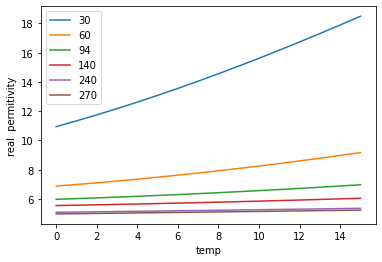

In [14]:
df3.plot()
plt.xlabel("temp")
plt.ylabel("real"+ "  permitivity")
plt.show()

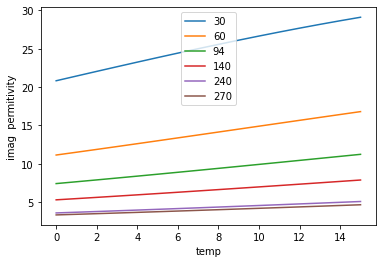

In [15]:
df4.plot()
plt.xlabel("temp")
plt.ylabel("imag"+ "  permitivity")
plt.show()

In [16]:
# experiment 2;



# From Rayleigh approximation of Mie’s forward scattering function, 
a relation between
refractivity N and water content in the fog has been derived and is given a


---
n=w(3/rho)(e-1)/e+2 ppm;
---
rho=1g/cm^3
--
e=e'-je"
--
w= liquid water content







# case1 
n'(f) vs the 0.1<w<1.5


In [63]:

def ye(freq,temp):
    return (real_E(freq,temp)+2)/imaginary(freq,temp)
def real_n(freq,temp,w):
    a=w*(9/2)
    e=1/(Eo(temp)+2)
    re=real_E(freq,temp)
    img=imaginary(freq,temp)
    y=ye(freq,temp)
    return a*(e-(y/img)*(y**2+1))
def imag(freq,temp,w):
    a=w*(9/2)
    y=ye(freq,temp)
    img=imaginary(freq,temp)
    return (w*(9/2))*((img*(y*y+1))**-1)
                      



In [70]:
print(np.arange (0.1, 1.6,0.20))

[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5]


In [74]:

import numpy as np
def func(temp):
    x=np.arange (0.1, 1.6, 0.02)
    data3=[]
    data4=[]
    t=300/(temp+275.15)
    for w in x:
        lis=[]
        lis2=[]
        for freq in [30,60,94,140,240,270]:
            lis.append(real_n(freq,t,w))
            lis2.append(imag(freq,t,w))
            data3.append(lis)
            data4.append(lis2)
    df5=pd.DataFrame(data3,columns=['30','60','94','140','240','270'])
    df6=pd.DataFrame(data4,columns=['30','60','94','140','240','270'])  
    df5.plot()
    plt.ylim(-0.5,0.5)
    plt.xlim(0.1,1.6)
    plt.xlabel("w")
    plt.ylabel("imag")
    plt.title(temp)
    plt.show()
    df6=pd.DataFrame(data4,columns=['30','60','94','140','240','270']) 
    df6.plot()
    plt.title( temp)
    #plt.ylim(-0.5,0.5)
    #plt.xlim(0.1,1.6)
    plt.xlabel("w")
    plt.ylabel("imag")
    plt.show()



    
        


    
    
 
        
      



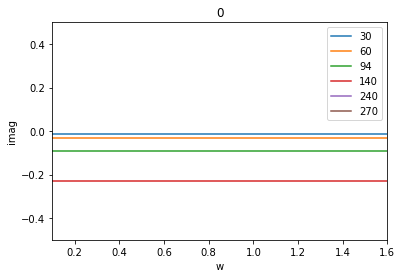

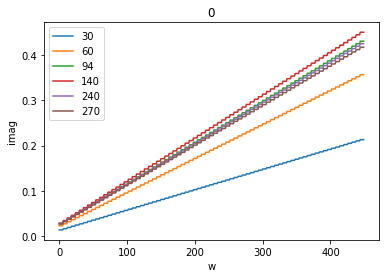

In [75]:
 func(0);

In [121]:
#expeiment 2
#case 2
import numpy as np
def func(temp):
    x=np.arange (0.1, 1.6,0.2)
    data3=[]
    data4=[]
    t=300/(temp+275.15)
    for freq in range(1,301):
        lis=[]
        lis2=[]
        for w in x:
            lis.append(real_n(freq,t,w))
            lis2.append(imag(freq,t,w))
            data3.append(lis)
            data4.append(lis2)
    df5=pd.DataFrame(data3,columns=["0.1" ,"0.3" ,"0.5", "0.7", "0.9", "1.1", "1.3", "1.5"])
    df6=pd.DataFrame(data4,columns=["0.1" ,"0.3" ,"0.5", "0.7", "0.9", "1.1", "1.3", "1.5"])  
    df5.plot()
    plt.ylim(-0.5,0.5)
    plt.xlim(65,300)
    plt.xlabel("feq")
    plt.ylabel("real")
    plt.title(temp)
    plt.show()
    df6=pd.DataFrame(data4,columns=["0.1" ,"0.3" ,"0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]) 
    df6.plot()
    plt.title( temp)
    #plt.ylim(-0.5,0.5)
    #plt.xlim(0.1,1.6)
    plt.xlabel("freq")
    plt.ylabel("imag")
    plt.show()

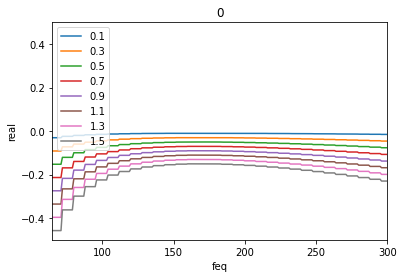

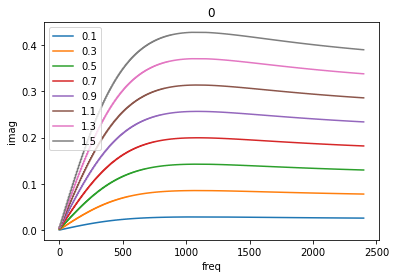

In [122]:
 func(0);

In [108]:
w=1.5
def a(freq,temp):
    return 0.1820*freq*imag(freq,temp,w)

In [109]:
temperture=[-5 ,0, 5,10]
data=[]
#data2=[]
for freq in range(30,301):
    lis=[]
    #lis2=[]
    for temp in temperture:
        t=300/(temp+275.15)
        lis.append(a(freq,t))
        #lis2.append(imaginary(freq,t))
    data.append(lis)
    #data2.append(lis2)

In [110]:
df7=pd.DataFrame(data,columns=['-5','0','5','10']);

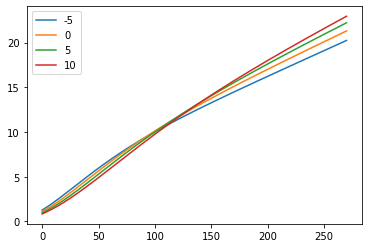

In [111]:
df7.plot()